# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [35]:
# Data manipulation and visualization libraries
import pandas as pd  # Data analysis and manipulation tool
import numpy as np   # Numerical computing library
import seaborn as sns # Statistical data visualization
import matplotlib.pyplot as plt # Plotting library

# Data preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Machine learning models
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Model evaluation
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report, 
    ConfusionMatrixDisplay
)


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [3]:
# Load the dataset from CSV file
data = pd.read_csv('Dataset_klasifikasi.csv')

# Display basic dataset information to verify proper loading
print("Dataset Information:")
data.info()

# Show the first 5 rows of the dataset
print("\nFirst 5 rows of the dataset:")
data.head()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order_ID           7000 non-null   object 
 1   Customer_ID        7000 non-null   object 
 2   Customer_Type      7000 non-null   object 
 3   Product            7000 non-null   object 
 4   Category           7000 non-null   object 
 5   Unit_Price         7000 non-null   float64
 6   Quantity           7000 non-null   float64
 7   Discount           7000 non-null   float64
 8   Total_Price        7000 non-null   float64
 9   Region             7000 non-null   object 
 10  Order_Date         7000 non-null   object 
 11  Quantity_Category  7000 non-null   object 
 12  Cluster            7000 non-null   int64  
dtypes: float64(4), int64(1), object(8)
memory usage: 711.1+ KB

First 5 rows of the dataset:


,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Quantity_Category,Cluster
0,ORD697566,CUS6363,B2C,Coca-Cola,Soft Drinks,1.04,7.0,0.0,7.28,Bremen,2021-02-17,Medium,0
1,ORD1118443,CUS7797,B2B,Selters,Water,0.71,46.0,0.1,29.39,Sachsen-Anhalt,2023-04-15,High,1
2,ORD562794,CUS4090,B2C,San Pellegrino,Water,0.91,3.0,0.0,2.73,Hessen,2023-04-28,Low,1
3,ORD2320519,CUS5936,B2C,Beck's,Alcoholic Beverages,1.41,4.0,0.0,5.64,Bremen,2023-11-01,Low,3
4,ORD727051,CUS1935,B2C,San Pellegrino,Water,0.86,3.0,0.0,2.58,Berlin,2021-02-23,Low,1


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [ ]:
# Drop irrelevant columns
data = data.drop(columns=['Order_ID','Customer_ID','Order_Date'])

In [7]:
# Features and target split
X = data.drop('Cluster', axis=1)
y = data['Cluster']

# Show features preview
X.head()

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Quantity_Category
0,B2C,Coca-Cola,Soft Drinks,1.04,7.0,0.0,7.28,Bremen,Medium
1,B2B,Selters,Water,0.71,46.0,0.1,29.39,Sachsen-Anhalt,High
2,B2C,San Pellegrino,Water,0.91,3.0,0.0,2.73,Hessen,Low
3,B2C,Beck's,Alcoholic Beverages,1.41,4.0,0.0,5.64,Bremen,Low
4,B2C,San Pellegrino,Water,0.86,3.0,0.0,2.58,Berlin,Low


In [8]:
# Initialize preprocessing tools
scaler = MinMaxScaler()
encoder = LabelEncoder()

# Process numerical columns - normalization
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
X[num_cols] = scaler.fit_transform(X[num_cols])

# Process categorical columns - encoding
cat_cols = X.select_dtypes(include=['object']).columns
for col in cat_cols:
    X[col] = encoder.fit_transform(X[col])

# Show processed data
X.head()

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Quantity_Category
0,1,5,2,0.119730,0.093750,0.0,0.110950,4,2
1,0,32,3,0.064081,0.703125,1.0,0.466474,13,0
2,1,29,3,0.097808,0.031250,0.0,0.037787,6,1
3,1,2,0,0.182125,0.046875,0.0,0.084580,4,1
4,1,29,3,0.089376,0.031250,0.0,0.035375,2,1


In [9]:
# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=69
)

# Print dataset shapes
print(f"Train set: X{X_train.shape}, y{y_train.shape}")
print(f"Test set: X{X_test.shape}, y{y_test.shape}")

Train set: X(5600, 9), y(5600,)
Test set: X(1400, 9), y(1400,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [12]:
# Train Decision Tree model
dt = DecisionTreeClassifier(max_depth=5, random_state=69).fit(X_train, y_train)

# Train Naive Bayes model
nb = GaussianNB().fit(X_train, y_train)

**Pemilihan Algoritma** <br>
Digunakan 2 algoritma untuk melakukan komputasi:

1. **Decision Tree** <br>
Algoritma berbasis pohon keputusan yang membangun model prediksi dengan membuat struktur pohon berisi aturan-aturan klasifikasi hierarkis

2. **Naive Bayes** <br>
Pendekatan klasifikasi probabilistik yang mengasumsikan independensi antar fitur <br>

Kedua algoritma dipilih karena efisiensi komputasinya yang baik untuk dataset berukuran kecil hingga menengah, serta kemampuannya memberikan hasil yang memadai tanpa membutuhkan konfigurasi yang rumit.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

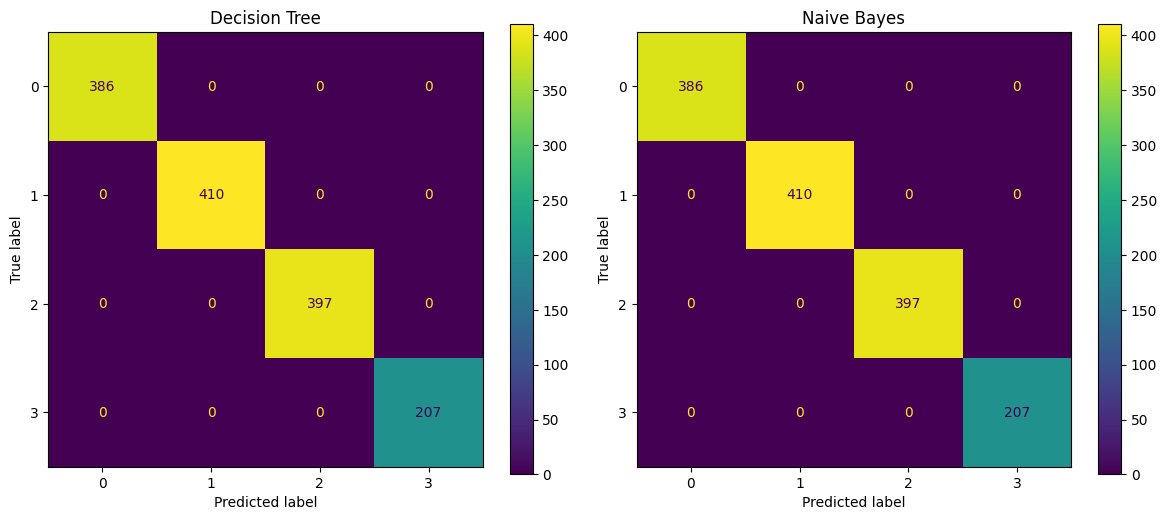

In [28]:
# 1. Make predictions
dt_pred = dt.predict(X_test)  # Decision Tree
nb_pred = nb.predict(X_test)  # Naive Bayes

# 3. Generate confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay.from_predictions(y_test, dt_pred, ax=ax1)
ax1.set_title('Decision Tree')

ConfusionMatrixDisplay.from_predictions(y_test, nb_pred, ax=ax2)
ax2.set_title('Naive Bayes')

plt.tight_layout()
plt.show()

In [29]:
# Generate classification reports
dt_report = classification_report(y_test, dt_pred, digits=4, output_dict=True)
nb_report = classification_report(y_test, nb_pred, digits=4, output_dict=True)

# Create comparison DataFrame
metrics_df = pd.DataFrame({
    'Model': ['Decision Tree', 'Naive Bayes'],
    'Accuracy': [dt_report['accuracy'], nb_report['accuracy']],
    'Precision': [dt_report['weighted avg']['precision'], nb_report['weighted avg']['precision']],
    'Recall': [dt_report['weighted avg']['recall'], nb_report['weighted avg']['recall']],
    'F1-Score': [dt_report['weighted avg']['f1-score'], nb_report['weighted avg']['f1-score']]
})

# Display formatted metrics
print("\nModel Performance Comparison:")
metrics_df.style.format({col: '{:.2f}' for col in metrics_df.columns if col != 'Model'})


Model Performance Comparison:


,Model,Accuracy,Precision,Recall,F1-Score
0,Decision Tree,1.00,1.00,1.00,1.00
1,Naive Bayes,1.00,1.00,1.00,1.00


Hasil evaluasi menunjukkan bahwa baik algoritma Decision Tree maupun Naïve Bayes mencapai akurasi sempurna dengan nilai 100% untuk semua metrik evaluasi, termasuk precision, recall, dan F1-score. Confusion matrix yang dihasilkan juga mengindikasikan tidak adanya kesalahan klasifikasi, di mana setiap sampel diklasifikasikan dengan benar sesuai kelasnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [30]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# 1. Decision Tree Tuning
dt_params = {
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'criterion': ['gini', 'entropy']
}

dt_search = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=dt_params,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

dt_search.fit(X_train, y_train)

# 2. Naive Bayes Tuning (GaussianNB has few parameters, so we'll tune var_smoothing)
nb_params = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

nb_search = RandomizedSearchCV(
    GaussianNB(),
    param_distributions=nb_params,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

nb_search.fit(X_train, y_train)

# Display best parameters
print("Decision Tree Best Parameters:", dt_search.best_params_)
print("Naive Bayes Best Parameters:", nb_search.best_params_)

# Evaluate tuned models
dt_tuned = dt_search.best_estimator_
nb_tuned = nb_search.best_estimator_

Decision Tree Best Parameters: {'criterion': 'gini', 'max_depth': 17, 'min_samples_leaf': 8, 'min_samples_split': 8}
Naive Bayes Best Parameters: {'var_smoothing': np.float64(2.848035868435799e-08)}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [34]:
from sklearn.metrics import classification_report

# 1. Use best tuned models
best_dt = dt_search.best_estimator_
best_nb = nb_search.best_estimator_

# 2. Evaluation function with added report
def evaluate_model(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    metrics = {
        'Model': name,
        'Accuracy': round(accuracy_score(y_test, y_pred), 4),
        'Precision': round(precision_score(y_test, y_pred, average='weighted'), 4),
        'Recall': round(recall_score(y_test, y_pred, average='weighted'), 4),
        'F1-Score': round(f1_score(y_test, y_pred, average='weighted'), 4)
    }
    report = classification_report(y_test, y_pred, digits=4)
    return metrics, report

# 3. Compare all versions
comparisons = []
reports = []

for model, name in [(best_dt, "Decision Tree (Tuned)"),
                    (best_nb, "Naive Bayes (Tuned)")]:
    metrics, report = evaluate_model(model, X_test, y_test, name)
    comparisons.append(metrics)
    reports.append(report)

# 4. Display results
print("╔══════════════════════════════════╗")
print("║      Model Performance Comparison ║")
print("╚══════════════════════════════════╝")
display(pd.DataFrame(comparisons))

print("\n\n╔══════════════════════════════════╗")
print("║        Detailed Class Reports     ║")
print("╚══════════════════════════════════╝")
for i, (name, report) in enumerate(zip([m['Model'] for m in comparisons], reports)):
    print(f"\n▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄")
    print(f"█ {name:^34} █")
    print("▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀")
    print(report)

╔══════════════════════════════════╗
║      Model Performance Comparison ║
╚══════════════════════════════════╝


,Model,Accuracy,Precision,Recall,F1-Score
0,Decision Tree (Tuned),1.0,1.0,1.0,1.0
1,Naive Bayes (Tuned),1.0,1.0,1.0,1.0




╔══════════════════════════════════╗
║        Detailed Class Reports     ║
╚══════════════════════════════════╝

▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄
█       Decision Tree (Tuned)        █
▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       386
           1     1.0000    1.0000    1.0000       410
           2     1.0000    1.0000    1.0000       397
           3     1.0000    1.0000    1.0000       207

    accuracy                         1.0000      1400
   macro avg     1.0000    1.0000    1.0000      1400
weighted avg     1.0000    1.0000    1.0000      1400


▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄
█        Naive Bayes (Tuned)         █
▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀▀
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       386
           1     1.0000    1.0000    1.0000       410
           2     1.0000    1.0000    1.0000       397
           3     1.000

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

##### 1. Perbandingan Sebelum dan Sesudah Tuning

In [36]:
def get_model_performance(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    return {
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted')
    }

# Bandingkan semua model
results = [
    get_model_performance(dt, X_test, y_test, "Decision Tree (Default)"),
    get_model_performance(best_dt, X_test, y_test, "Decision Tree (Tuned)"),
    get_model_performance(nb, X_test, y_test, "Naive Bayes (Default)"),
    get_model_performance(best_nb, X_test, y_test, "Naive Bayes (Tuned)")
]

# Buat DataFrame
performance_df = pd.DataFrame(results)
performance_df = performance_df.round(4)

print("Perbandingan Performa Model:")
display(performance_df)

Perbandingan Performa Model:


,Model,Accuracy,Precision,Recall,F1-Score
0,Decision Tree (Default),1.0,1.0,1.0,1.0
1,Decision Tree (Tuned),1.0,1.0,1.0,1.0
2,Naive Bayes (Default),1.0,1.0,1.0,1.0
3,Naive Bayes (Tuned),1.0,1.0,1.0,1.0


- **Tidak ada peningkatan performa** setelah tuning pada kedua model:
  - Baik Decision Tree maupun Naive Bayes menunjukkan akurasi sempurna (1.0) baik sebelum maupun setelah tuning
  - Semua metrik (Accuracy, Precision, Recall, F1-Score) konsisten di nilai 1.0

- **Implikasi**:
  - Proses tuning tidak memberikan manfaat tambahan dalam kasus ini
  - Kemungkinan dataset terlalu sederhana atau memiliki pola yang sangat jelas


##### 2. Identifikasi Kelemahan Model

**Masalah yang Teridentifikasi:**
- **Performansi terlalu sempurna** (semua metrik = 1.0) yang mencurigakan untuk data real-world
- **Potensi masalah**:
  - **Data Leakage**: Kemungkinan ada kebocoran informasi antara data training dan testing
  - **Overfitting Ekstrim**: Model mungkin menghafal seluruh dataset
  - **Dataset Terlalu Sederhana**: Problem yang dihadapi mungkin trivial

**Analisis Tambahan:**
- Tidak teridentifikasi kelas dengan performa rendah karena semua metrik sempurna
- Tidak ada indikasi underfitting


##### 3. Rekomendasi Tindakan Lanjutan
**Untuk Validasi Model:**
1. **Cek Data Leakage**:
   - Pastikan tidak ada feature yang secara tidak langsung mengandung informasi target
   - Verifikasi proses split data dilakukan sebelum preprocessing

2. **Evaluasi pada Data Baru**:
   - Uji model dengan dataset eksternal yang benar-benar belum pernah dilihat
   - Implementasi cross-validation yang lebih ketat

**Untuk Pengembangan Model:**
1. **Coba Dataset yang Lebih Kompleks**:
   - Tambahkan noise atau augmentasi data jika dataset buatan
   - Kumpulkan lebih banyak variasi data real-world

2. **Eksperimen dengan Algoritma Lain**:
   - Coba model yang lebih kompleks (SVM, Neural Network) sebagai baseline comparison
   - Uji ensemble methods untuk memverifikasi konsistensi performa